In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/panda

/content/drive/My Drive/panda


**We live in a world with different timezones. If you are having morning coffee in new york at 9 AM it might be a time for dinner in Mumbai, India because it would be 6.30 PM there. Handling time zone could become necessity while doing time series analysis in Pandas**

#Read microsoft's intraday stock prize

In [3]:
df = pd.read_csv("msft.csv")
df


,"Microsoft Stock Price: 17 August, 2017",Unnamed: 1
0,Date Time,Price
1,8/17/2017 9:00:00 AM,72.38
2,8/17/2017 9:15:00 AM,71
3,8/17/2017 9:30:00 AM,71.67
4,8/17/2017 10:00:00 AM,72.8
5,8/17/2017 10:30:00 AM,73
6,8/17/2017 11:00:00 AM,72.5


In [4]:
df = pd.read_csv("msft.csv",header=1)       #setting header=row 1
df

,Date Time,Price
0,8/17/2017 9:00:00 AM,72.38
1,8/17/2017 9:15:00 AM,71.00
2,8/17/2017 9:30:00 AM,71.67
3,8/17/2017 10:00:00 AM,72.80
4,8/17/2017 10:30:00 AM,73.00
5,8/17/2017 11:00:00 AM,72.50


In [5]:
df = pd.read_csv("msft.csv",header=1,index_col='Date Time')   #setting index datetime
df

,Price
Date Time,
8/17/2017 9:00:00 AM,72.38
8/17/2017 9:15:00 AM,71.00
8/17/2017 9:30:00 AM,71.67
8/17/2017 10:00:00 AM,72.80
8/17/2017 10:30:00 AM,73.00
8/17/2017 11:00:00 AM,72.50


In [6]:
df = pd.read_csv("msft.csv",header=1,index_col='Date Time',parse_dates=True)    #converting date into date Time format
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [7]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

#**There are two types of datetimes in python:**
1. **Naive (no timezone awareness)**
2. **Timezone aware datetime**

#**Convert naive DatetimeIndex to timezone aware DatetimeIndex using tz_localize**

In [30]:
df = df.tz_convert('Us/Eastern')
df


,Price
Date Time,
2017-08-17 09:00:00-04:00,72.38
2017-08-17 09:15:00-04:00,71.00
2017-08-17 09:30:00-04:00,71.67
2017-08-17 10:00:00-04:00,72.80
2017-08-17 10:30:00-04:00,73.00
2017-08-17 11:00:00-04:00,72.50


In [31]:
df = df.tz_convert('Us/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

#**Convert to Berlin time using tz_convert**

In [19]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [20]:
df.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

#**Printing a list of all types of timezones**

In [21]:
from pytz import all_timezones
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

#**Convert to Mumbai time**

In [22]:
df.index = df.index.tz_convert('Asia/Calcutta') # tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


#**Using timezones in date_range**

#**(1) timezone using pytz**

In [23]:
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

DatetimeIndex(['2012-03-06 00:09:00+00:00', '2012-03-06 01:09:00+00:00',
               '2012-03-06 02:09:00+00:00', '2012-03-06 03:09:00+00:00',
               '2012-03-06 04:09:00+00:00', '2012-03-06 05:09:00+00:00',
               '2012-03-06 06:09:00+00:00', '2012-03-06 07:09:00+00:00',
               '2012-03-06 08:09:00+00:00', '2012-03-06 09:09:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

#**(2) timezone using dateutil**

In [24]:
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td

DatetimeIndex(['2012-03-06 00:00:00+00:00', '2012-03-06 01:00:00+00:00',
               '2012-03-06 02:00:00+00:00', '2012-03-06 03:00:00+00:00',
               '2012-03-06 04:00:00+00:00', '2012-03-06 05:00:00+00:00',
               '2012-03-06 06:00:00+00:00', '2012-03-06 07:00:00+00:00',
               '2012-03-06 08:00:00+00:00', '2012-03-06 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('/usr/share/zoneinfo/Europe/London')]', freq='H')

#**Pandas documentation indicates that difference between pytz timezone and dateutil timezones is**
**In pytz you can find a list of common (and less common) time zones using from pytz import common_timezones, all_timezones
dateutil uses the OS timezones so there isn’t a fixed list available. For common zones, the names are the same as pytz**

#Airthmetic between different timezones

In [25]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [26]:
b = s.tz_localize(tz="Europe/Berlin")   # Europe timezone
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [28]:
m = s.tz_localize(tz="Asia/Calcutta")   # Mumbai timezone
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64

#**It will first convert individual timezones to UTC and then align datetimes to perform addition/subtraction etc. operations**

In [29]:
b+m

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

#Date alignment is shown below



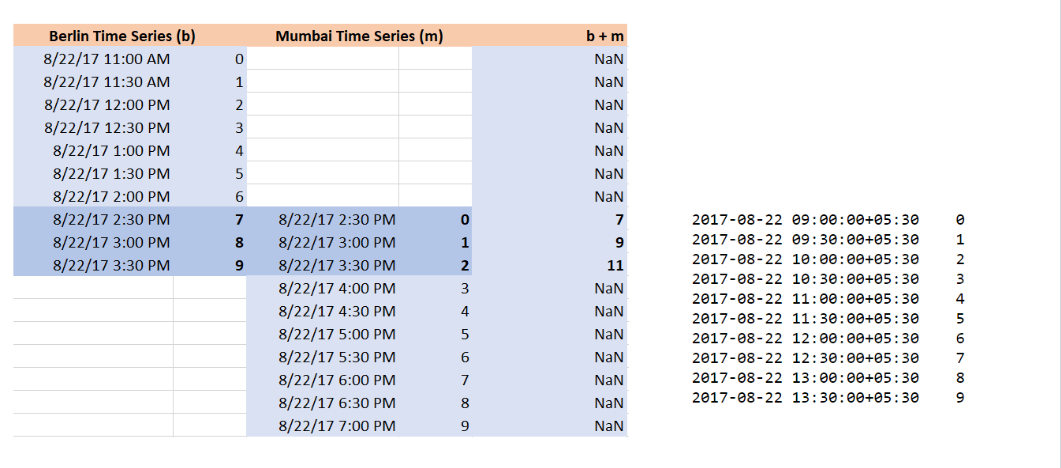